# Pymaceuticals Inc.
---

### Analysis

- looking at Capomulin's data agaisnt oder drug treatments. The mean tumor size and standard deviation are one of the lowest in the testing second only to Ramicane. The mice population was evenly split at 51% male and 49% female. Again, looking at the box plot, the results are right on par with those with Ramicane. 
During the first days of treament, the tumor volume kept increasing, but droped sharply at the 20 day mark.  
on another note, there was a positive correlation between the mouse weight and the tumor volume size of each mouse. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(mouse_metadata, study_results, how = 'right', on = ["Mouse ID"])

#Re-Arranging Column order
study_df = study_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)","Metastatic Sites", "Drug Regimen", "Sex", "Age_months","Weight (g)"]]

# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = study_df["Mouse ID"].nunique()
mouse_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate mice
duplicate_mice = study_df[study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

# Display the duplicate mice
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all_data = study_df[study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicate_mice_all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_study_df = study_df[~study_df["Mouse ID"].isin(duplicate_mice)]
cleaned_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
mouse_count_no_duplicates = cleaned_study_df["Mouse ID"].nunique()
mouse_count_no_duplicates


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_stats = cleaned_study_df.groupby(["Drug Regimen"])

mean_tumor_volume = regimen_stats["Tumor Volume (mm3)"].mean()
median_tumor_volume = regimen_stats["Tumor Volume (mm3)"].median()
tumor_volume_variance= regimen_stats["Tumor Volume (mm3)"].var()
tumor_volume_stdv= regimen_stats["Tumor Volume (mm3)"].std()
tumor_volume_sterr=regimen_stats["Tumor Volume (mm3)"].sem()

regimen_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_stdv,
    "Tumor Volume Std. Err.": tumor_volume_sterr
})
regimen_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

regimen_stats_df = cleaned_study_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

regimen_stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

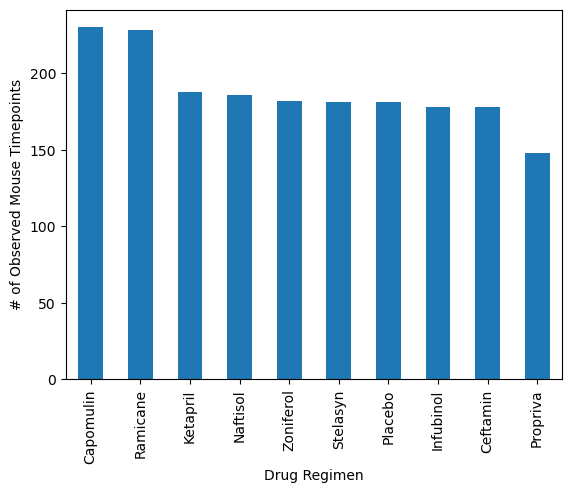

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = cleaned_study_df["Drug Regimen"].value_counts()

regimen_counts.plot.bar(rot=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

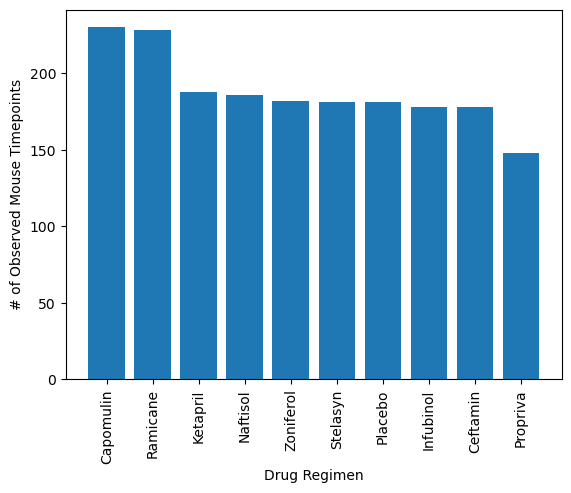

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get the unique drug regimens and their counts
drug_regimens = cleaned_study_df["Drug Regimen"].value_counts()
regimen_names = drug_regimens.index
regimen_counts = drug_regimens.values

# Create the bar plot
plt.bar(regimen_names, regimen_counts)

# Customize the plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)  
# Display the plot
plt.show()

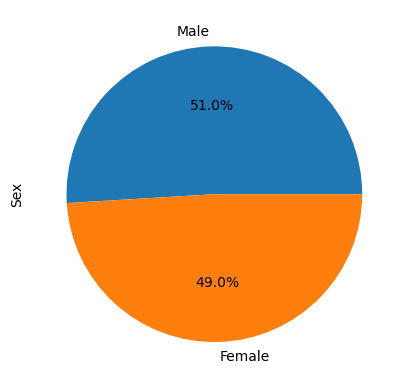

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = cleaned_study_df["Sex"].value_counts()
sex.plot(kind='pie', labels=["Male", "Female"], autopct="%1.1f%%", ylabel= "Sex")
plt.show()


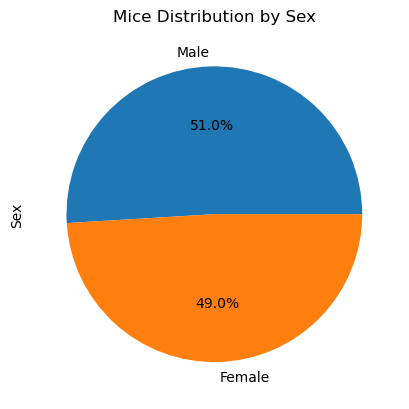

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pyplot = cleaned_study_df["Sex"].value_counts()
plt.pie(sex_pyplot, labels = ["Male","Female"], autopct="%1.1f%%")
plt.title("Mice Distribution by Sex")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_study_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.DataFrame(last_timepoint)
merged_df = pd.merge(last_timepoint_df, cleaned_study_df, on =["Mouse ID", "Timepoint"], how = "left")
#filter data to only include Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Campomulin","Ramicane","Infubinol","Ceftamin"]
final_tumor_volume = merged_df["Drug Regimen"].isin(treatment_regimens)


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    #boundries
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    #Check for outliers
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


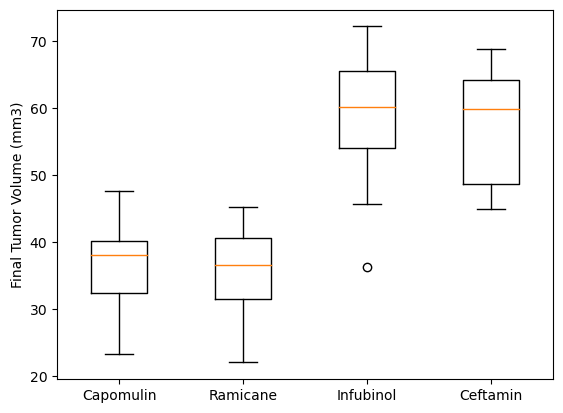

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels = treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

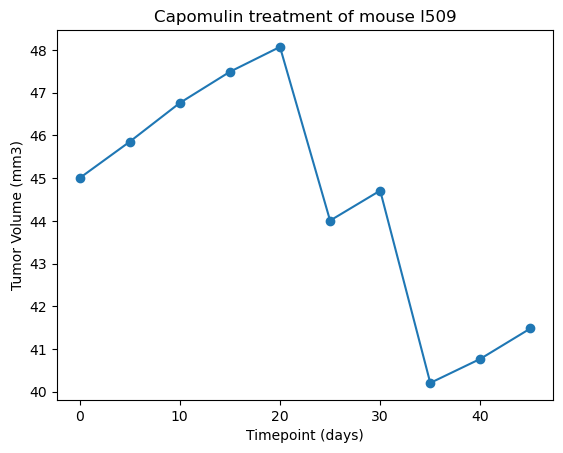

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"

#checked the data for the selected mouse and the Capomulin treatment
mouse_data = cleaned_study_df[(cleaned_study_df["Drug Regimen"]=="Capomulin") & (cleaned_study_df["Mouse ID"] == mouse_id)]

#sort the data by timepoint
mouse_data = mouse_data.sort_values("Timepoint")

#created line plot

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker = "o")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

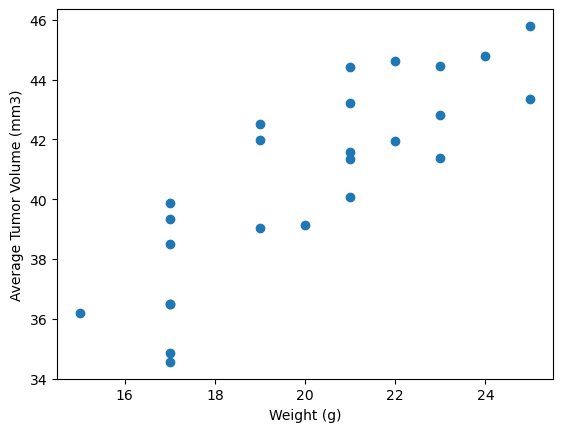

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_study_df[(cleaned_study_df["Drug Regimen"] == "Capomulin")]

#calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

#get the tumor weight
tumor_weight = capomulin_data.groupby(["Mouse ID"])["Weight (g)"].first()

#create the scatter plot
plt.scatter(tumor_weight, average_tumor_volume)

# Customize the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


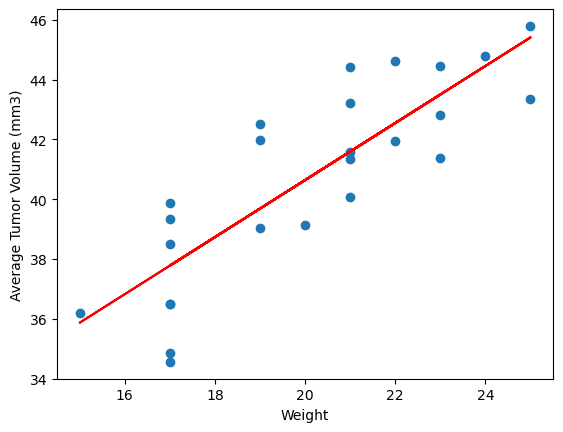

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = np.corrcoef(tumor_weight, average_tumor_volume)[0, 1]
print("Correlation Coefficient:", correlation)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_weight, average_tumor_volume)

# Create a scatter plot and regression line
plt.scatter(tumor_weight, average_tumor_volume)
plt.plot(tumor_weight, tumor_weight * slope + intercept, color="red")

# Custumize the plot
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight")

plt.show()